In [1]:
import tensorflow as tf
import tensorflow_io as tfio
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
import IPython.display as ipd

2023-04-23 14:57:58.407665: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-23 14:57:59.166855: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [128]:
def wav_to_tf(filename):
    bits = tf.io.read_file(filename)
    x = tfio.audio.decode_wav(bits,dtype=tf.int16)[:,0]
    x = tf.cast(x,tf.float32)
    x = x - tf.math.reduce_mean(x);
    x = x / tf.math.reduce_std(x)
    return tf.Variable(x)

def play(x):
    ipd.display(ipd.Audio(x,rate=24000,autoplay=False))
    
def slog(x):
    return tf.sign(x) * tf.math.log( tf.math.abs(x) )

def show(X):
    plt.figure(figsize=(20,9))
    plt.imshow(tf.transpose(slog(X)),origin='lower',cmap='PiYG')
    plt.colorbar()
    plt.clim((-3,3))
    
def mdct(x):
    X = tf.signal.mdct(x,624);
    return tf.Variable(X)

def imdct(X):
    y = tf.signal.inverse_mdct(X)
    return y

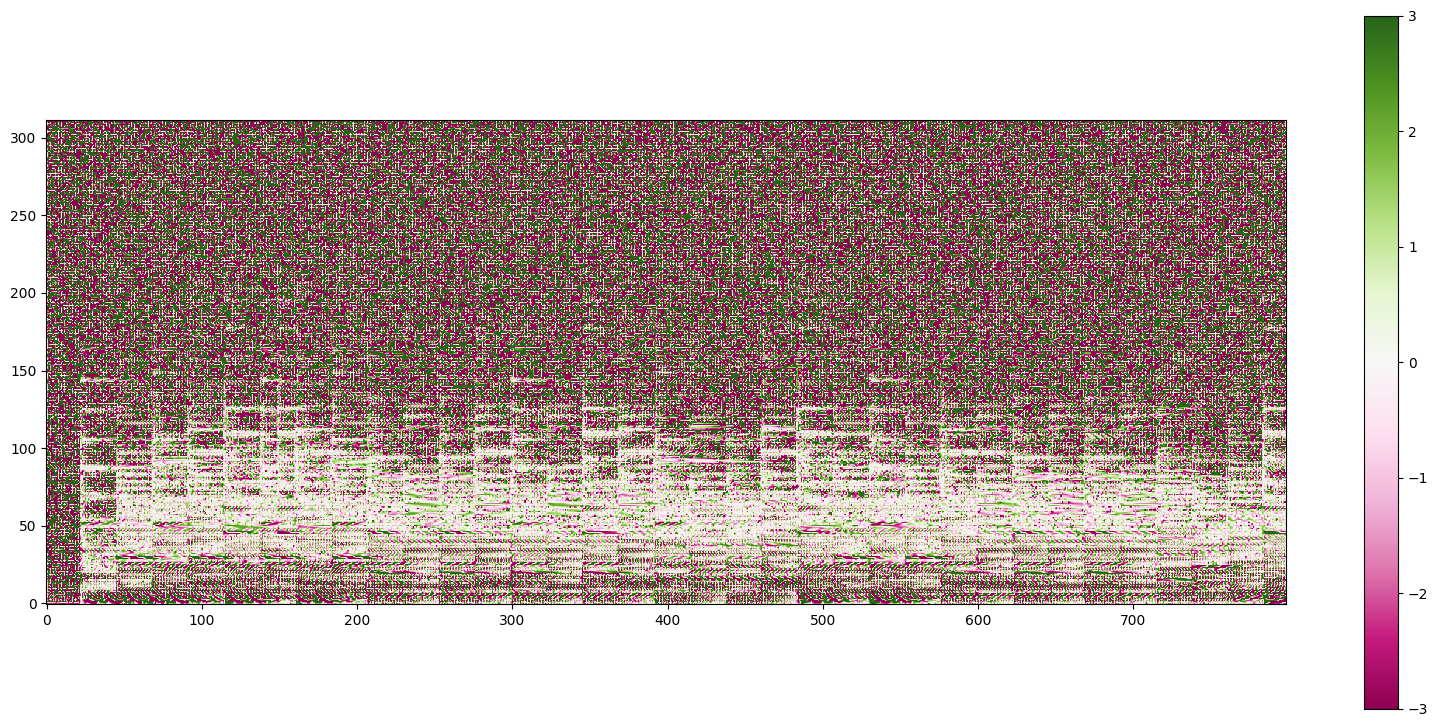

In [129]:
x = wav_to_tf('piano.wav')
X = mdct(x)
y = imdct(X)
play(x)
play(y)
show(X)

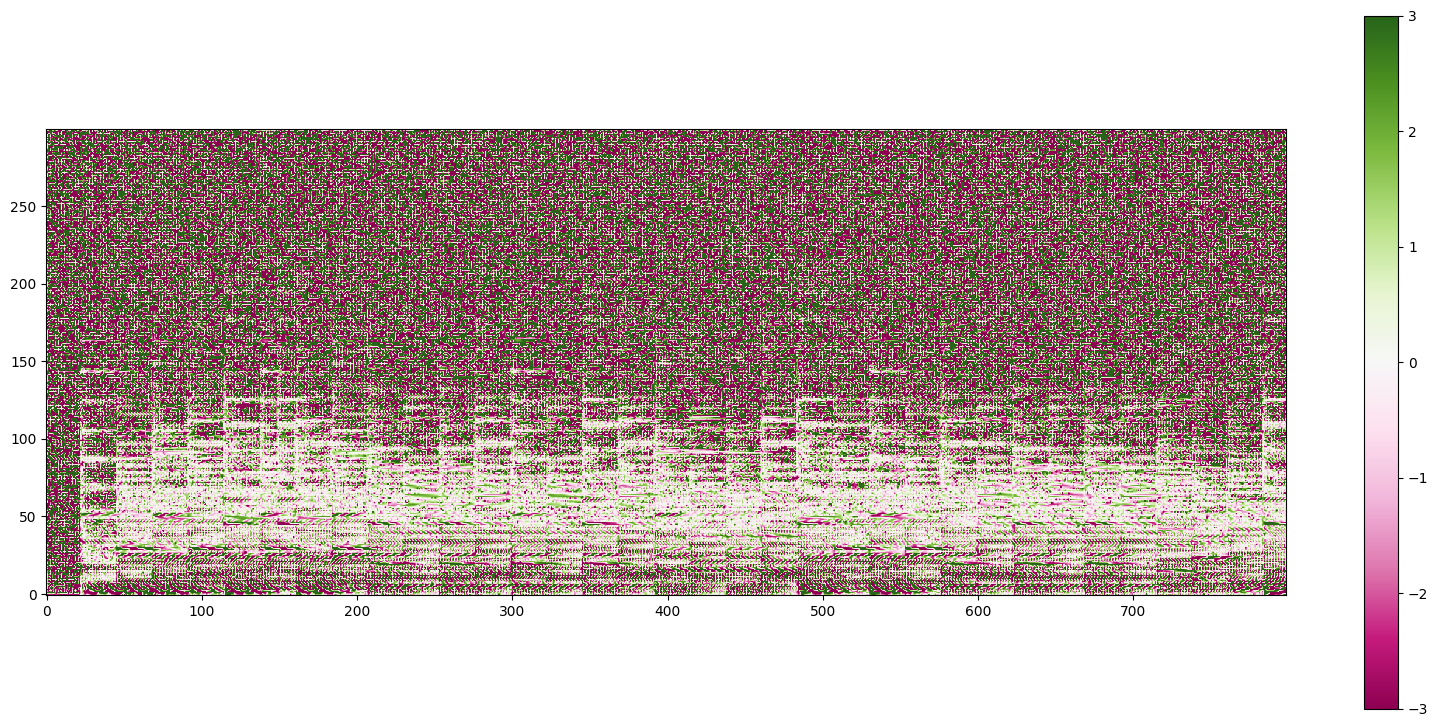

In [133]:
Z = tf.Variable(X)
Z[:,300:].assign(0)
show(Z[:,0:300])
play(imdct(Z))